# Manifold Learning - tSNE+UMAP - Advanced Topics

## Sanity Check: What are tSNE and UMAP doing with Random Noise?

Automatically created module for IPython interactive environment


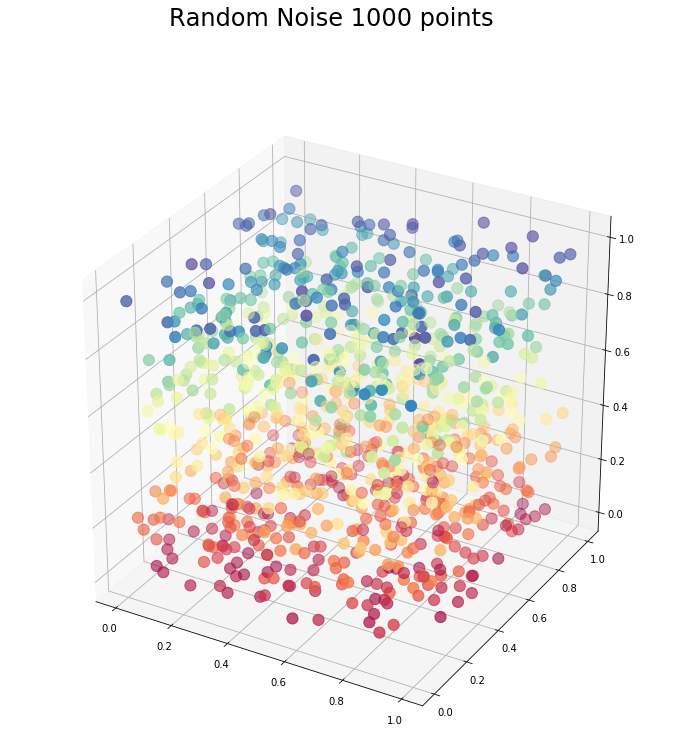

In [4]:
# Adjustments by S.Kuehn, stefan.kuehn@xing.com

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
%matplotlib inline
from sklearn import manifold, datasets
import numpy as np

# Next line to silence pyflakes. This import is needed.
Axes3D

# Parameters
n_points = 1000
n_components = 2 # for tSNE / PCA
init_random_state=0 # for all methods, change if you like (42 is the value of choice)

# Generate a random point cloud, take z component for coloring
X2 = np.random.rand(n_points, 3)
color2 = X2[:,2]

fig = plt.figure(figsize=(12, 12))
plt.suptitle("Random Noise %i points"
             % (n_points), fontsize=24)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=color2, cmap=plt.cm.Spectral,s=125)
#ax.view_init(4, -72)
plt.show()

## Baseline: Random Projections and PCA

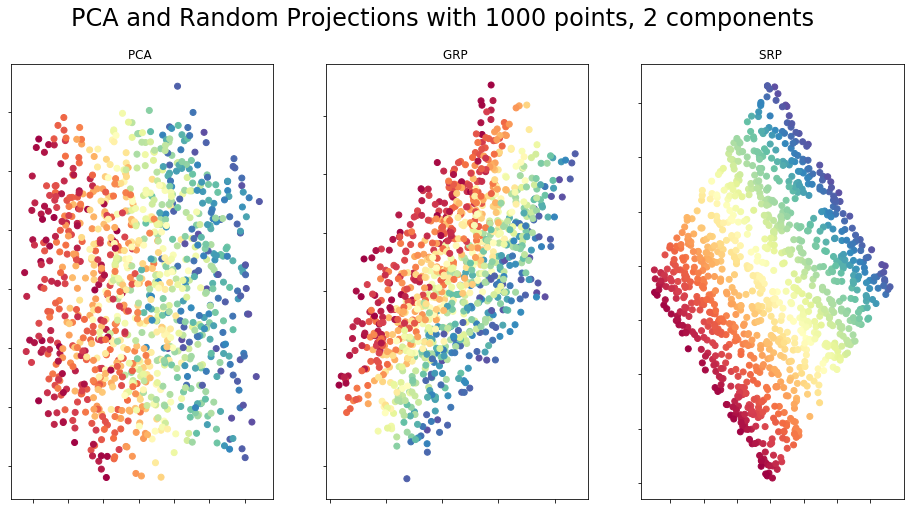

In [5]:
from sklearn import random_projection
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(16, 8))
plt.suptitle("PCA and Random Projections with %i points, %i components"
             % (n_points, n_components), fontsize=24)

# PCA
pca = PCA(n_components=2)
Y = pca.fit_transform(X2)

ax = fig.add_subplot(131)
plt.scatter(Y[:, 0], Y[:, 1], c=color2, cmap=plt.cm.Spectral)
plt.title("%s " % ('PCA'))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Gaussian Random Projection - GRP
transformer = random_projection.GaussianRandomProjection(n_components=2, random_state=init_random_state)
Y = transformer.fit_transform(X2)
    
ax = fig.add_subplot(132)
plt.scatter(Y[:, 0], Y[:, 1], c=color2, cmap=plt.cm.Spectral)
plt.title("%s " % ('GRP'))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Sparse Random ProjectiSRP
transformer = random_projection.SparseRandomProjection(n_components=2, random_state=init_random_state)
Y = transformer.fit_transform(X2)
    
ax = fig.add_subplot(133)
plt.scatter(Y[:, 0], Y[:, 1], c=color2, cmap=plt.cm.Spectral)
plt.title("%s " % ('SRP'))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight');


## Try t-SNE

In [9]:
t0 = time()
tsne = manifold.TSNE(n_components=2, random_state=1, perplexity=30)
Y = tsne.fit_transform(X2)
t1 = time()

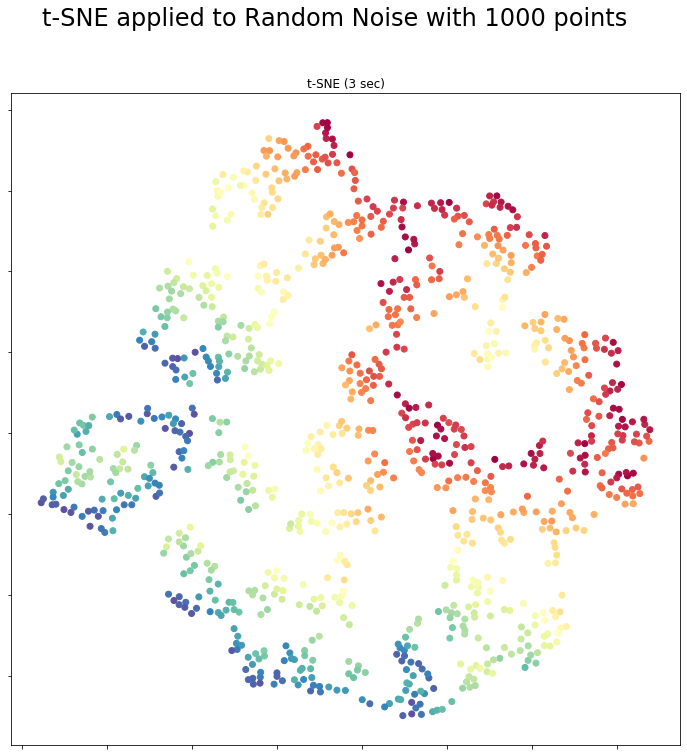

In [10]:
# Plot result
fig = plt.figure(figsize=(12, 12))
plt.suptitle("t-SNE applied to Random Noise with %i points"
             % (n_points), fontsize=24)

ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color2, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight');

tSNE applied to random noise - it seems to enforce a certain local structure even if it is not really there.

## Try UMAP

In [11]:
import umap
t0 = time()
Y= umap.UMAP(n_neighbors=15,
                      min_dist=0.3,
                      metric='euclidean').fit_transform(X2)
t1 = time()

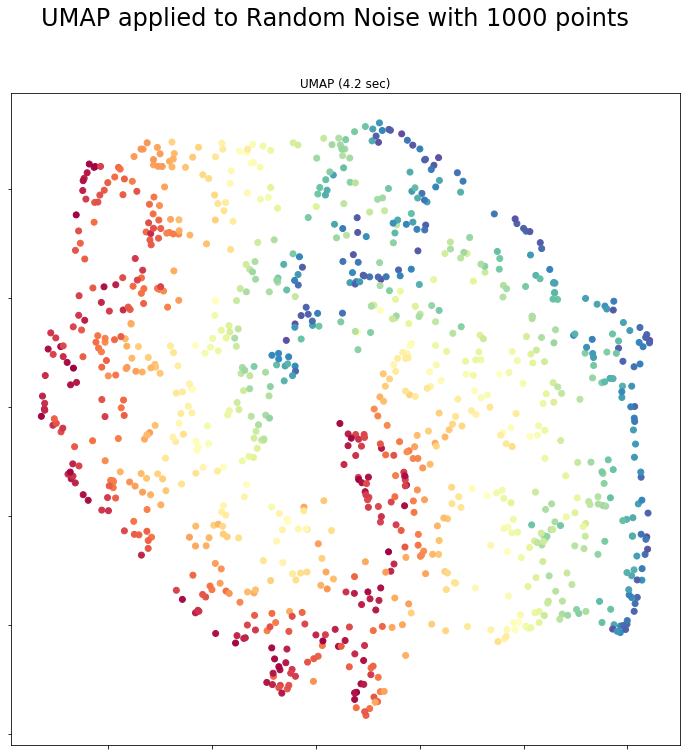

In [13]:
# Plot result
fig = plt.figure(figsize=(12, 12))
plt.suptitle("UMAP applied to Random Noise with %i points"
             % (n_points), fontsize=24)

ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color2, cmap=plt.cm.Spectral)
plt.title("UMAP (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight');

Well, interesting.

# Practical Test Random Noise

Adjust perplexity parameter in the cell below such that the result looks like "random noise".

In [15]:
t0 = time()
tsne = manifold.TSNE(n_components=2, random_state=1, perplexity=30)
Y = tsne.fit_transform(X2)
t1 = time()

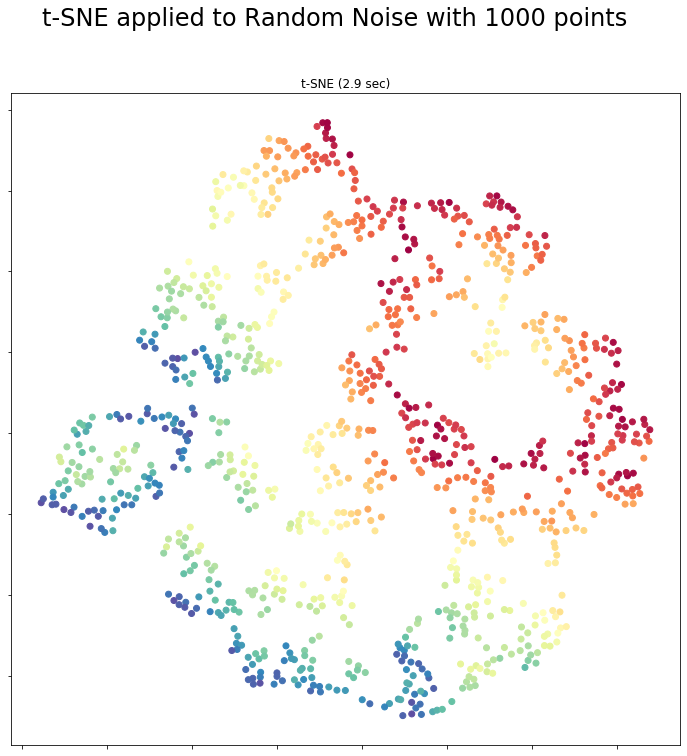

In [16]:
# Plot result
fig = plt.figure(figsize=(12, 12))
plt.suptitle("t-SNE applied to Random Noise with %i points"
             % (n_points), fontsize=24)

ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color2, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight');

## Takewaways

1. Don't tune perplexity until you "find" structure - you will always find something. 
2. In case you have found something, try to validate / reproduce it using other methods. If you cannot reproduce something that looks at least a bit like your initial finding, you should not use it.